<h1 style="font-size: 50px;">Relational Automatic Learning</h1>

<div style="width: 100%; height: 1px; background-color: black; margin-top: 20px; margin-bottom: 20px"></div>

<h3>Importando librerías</h3>

In [1]:
#Abrirlo desde jupyter (no desde sage)
%reset
#!pip install networkx
#!pip install scikit-learn

import networkx as nx
import sklearn as sk

import pandas
import numpy
import matplotlib.pyplot as plt


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


<h3>Variables de configuración</h3>

In [2]:
numberOfNodes = 20000 #Recomendado 20000 para reducir tiempos de ejecución

<h3>Lectura de nodos (Artists)</h3>

In [3]:
spotifyArtists = pandas.read_csv('../data/nodes.csv', header=1, low_memory=False,
                          names=['spotify_id','name','followers','popularity','genres','chart_hits'])

In [4]:
print(spotifyArtists.shape)

(156421, 6)


In [5]:
# 5 primeras filas
spotifyArtists.head(5)

,spotify_id,name,followers,popularity,genres,chart_hits
0,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
1,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
2,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
3,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']
4,0FQMb3mVrAKlyU4H5mQOJh,Madh,26677.0,19,[],['it (2)']


<h3>Lectura de aristas (Artists feats)</h3>

In [6]:
artistsFeats = pandas.read_csv('../data/edges.csv', header=1, low_memory=False,
                          names=['id_0','id_1'])

In [7]:
print(artistsFeats.shape)

(300385, 2)


In [8]:
# 5 primeras filas
artistsFeats.head(5)

,id_0,id_1
0,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD
1,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z
2,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh
3,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0
4,0k70gnDBLPirCltbTzoxuM,5FK3qokBQYxr7ZLkr8GVFn


<h3>Subconjunto de 20.000 nodos</h3>
</br>
<div>Nos quedamos con los 20 mil primeros nodos y las aristas, que en origen y destino, apunten a dichos nodos.</div>

<h4>Subconjunto de nodos</h4>

In [9]:
subSpotifyArtists = spotifyArtists.drop_duplicates(subset='spotify_id').head(numberOfNodes) #Elimina nodos duplicados (mismo id)

print(subSpotifyArtists.shape)
subSpotifyArtists.head(5)

(20000, 6)


,spotify_id,name,followers,popularity,genres,chart_hits
0,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
1,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
2,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
3,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']
4,0FQMb3mVrAKlyU4H5mQOJh,Madh,26677.0,19,[],['it (2)']


<h4>Subconjunto de aristas</h4>

In [10]:
subArtistsFeat = artistsFeats[artistsFeats['id_0'].isin(subSpotifyArtists['spotify_id']) & artistsFeats['id_1'].isin(subSpotifyArtists['spotify_id'])]

print(subArtistsFeat.shape)
subArtistsFeat.head(5)

(72944, 2)


,id_0,id_1
0,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD
4,0k70gnDBLPirCltbTzoxuM,5FK3qokBQYxr7ZLkr8GVFn
5,1bAftSH8umNcGZ0uyV7LMg,1vqR17Iv8VFdzure1TAXEq
6,21ey6s5hEcTcVKDrF5MWby,7uMh23xWiuR7zsNkuNcm2G
11,4Cmzjffz7uLaESQIWIs9G5,6XvZkxVvGXWhlDFTR6Q4sj


<h3>Generando el grafo con NetworkX</h3>

In [11]:
artistsGraph = nx.Graph()

for index, row in subSpotifyArtists.iterrows():
    node_id = row['spotify_id']
    node_attributes = row.drop('spotify_id')
    artistsGraph.add_node(node_id, **node_attributes)

for index, row in subArtistsFeat.iterrows():
    node_id_0 = row['id_0']
    node_id_1 = row['id_1']
    artistsGraph.add_edge(node_id_0, node_id_1)

# Imprimimos la cantidad de nodos y aristas
print("Cantidad de nodos:", artistsGraph.number_of_nodes())
print("Cantidad de aristas:", artistsGraph.number_of_edges())

Cantidad de nodos: 20000
Cantidad de aristas: 72944


In [12]:
# Pintar el grafo completo (si hay muchos nodos tarda bastante. Muchos = mas de 3000 nodos) 
if(numberOfNodes<=3000): #Si hay más de 3000 no se visualiza porque tarda demasiado
    nx.draw(artistsGraph, node_size=1, alpha=0.9) 

    plt.show()

<h4>Añadiendo la centralidad a la información de los nodos del grafo</h4>

In [13]:
# Calcula la centralidad de grado todos nodos
degree_centrality = nx.degree_centrality(artistsGraph)

# Crea una lista de tuplas con los valores de centralidad
centrality_values = [(node, centrality) for node, centrality in degree_centrality.items()]

# Crea un DataFrame con los valores de centralidad
centrality_df = pandas.DataFrame(centrality_values, columns=['spotify_id', 'centrality'])

# Une el DataFrame de centralidad con el DataFrame subSpotifyArtists
subSpotifyArtistsCentral = subSpotifyArtists.merge(centrality_df, on='spotify_id')

# Imprime el DataFrame con la nueva columna 'centrality'
subSpotifyArtistsCentral[['spotify_id', 'centrality']].head(5)

,spotify_id,centrality
0,4lDiJcOJ2GLCK6p9q5BgfK,0.00215
1,652XIvIBNGg3C0KIGEJWit,0.00025
2,3dXC1YPbnQPsfHPVkm1ipj,0.00025
3,74terC9ol9zMo8rfzhSOiG,0.00005
4,0FQMb3mVrAKlyU4H5mQOJh,0.00010


<h4>Añadiendo el coeficiente de clustering a la información de los nodos del grafo</h4>

In [14]:
# Calcula el coeficiente de clustering de los nodos
clustering_coefficient = nx.clustering(artistsGraph)

# Crea una lista de tuplas con los valores de coeficiente de clustering
clustering_values = [(node, coefficient) for node, coefficient in clustering_coefficient.items()]

# Crea un DataFrame con los valores de coeficiente de clustering
clustering_df = pandas.DataFrame(clustering_values, columns=['spotify_id', 'clustering'])

# Une el DataFrame de coeficiente de clustering con el DataFrame subSpotifyArtists
subSpotifyArtistsCluster = subSpotifyArtistsCentral.merge(clustering_df, on='spotify_id')

# Imprime el DataFrame con la nueva columna 'clustering'
print(subSpotifyArtistsCluster[['spotify_id', 'centrality', 'clustering']].head(5))


               spotify_id  centrality  clustering
0  4lDiJcOJ2GLCK6p9q5BgfK     0.00215    0.131783
1  652XIvIBNGg3C0KIGEJWit     0.00025    0.200000
2  3dXC1YPbnQPsfHPVkm1ipj     0.00025    0.500000
3  74terC9ol9zMo8rfzhSOiG     0.00005    0.000000
4  0FQMb3mVrAKlyU4H5mQOJh     0.00010    1.000000


<h4>Añadiendo la comunidad a la información de los nodos del grafo</h4>

In [17]:
# Detecta comunidades en el grafo utilizando el algoritmo de Label Propagation
communities = nx.algorithms.community.label_propagation.label_propagation_communities(artistsGraph)

# Crea un diccionario para mapear cada nodo a su número de comunidad
node_community_map = {}
for i, community in enumerate(communities):
    for node in community:
        node_community_map[node] = i + 1

# Agrega la columna 'community' al DataFrame subSpotifyArtists
subSpotifyArtistsCommunity = subSpotifyArtistsCluster
subSpotifyArtistsCommunity['community'] = subSpotifyArtistsCluster['spotify_id'].map(node_community_map)

# Imprime el DataFrame con la nueva columna 'community'
print(subSpotifyArtistsCommunity[['spotify_id', 'centrality', 'clustering', 'community']].head(5))


               spotify_id  centrality  clustering  community
0  4lDiJcOJ2GLCK6p9q5BgfK     0.00215    0.131783          1
1  652XIvIBNGg3C0KIGEJWit     0.00025    0.200000          1
2  3dXC1YPbnQPsfHPVkm1ipj     0.00025    0.500000          2
3  74terC9ol9zMo8rfzhSOiG     0.00005    0.000000          3
4  0FQMb3mVrAKlyU4H5mQOJh     0.00010    1.000000          4


In [19]:
subSpotifyArtistsCommunity.columns

Index(['spotify_id', 'name', 'followers', 'popularity', 'genres', 'chart_hits',
       'centrality', 'clustering', 'community'],
      dtype='object')

In [57]:


chartHitsMap = {}

for index, row in subSpotifyArtistsCommunity.iterrows():
    if isinstance(row['chart_hits'], str):
        chartHitsMap[row['spotify_id']] = len(row['chart_hits'].split(','))
    else:
        chartHitsMap[row['spotify_id']] = 0

subSpotifyArtistHits = subSpotifyArtistsCommunity
countryCounts = subSpotifyArtistsCommunity['spotify_id'].map(chartHitsMap)

subSpotifyArtistHits['country_hits_count'] = countryCounts
subSpotifyArtistImportantColumns =subSpotifyArtistHits.drop(['chart_hits','genres','name','spotify_id'],axis=1)
#Como los generos son unos arrays necesitamos discretizarlo añadiendo 
#nuevas columnas. Para esto nos ayudamos de MultiLabelBinarizer una 
#parte del preprocessing, pero es muy pesado asi que no lo usamos finalmente
#from sklearn.preprocessing import MultiLabelBinarizer
#mlb = MultiLabelBinarizer()

#genres_list = [genres.replace('"','').replace('[','').replace(']','').replace('\'','').strip().split(',') for genres in allAttributes['genres']]
####### Convertir la lista de listas en variables binarias
#genres_encoded = mlb.fit_transform(genres_list)

####### Crear un nuevo DataFrame con las variables binarias
#genres_df = pandas.DataFrame(genres_encoded, columns=mlb.classes_)

####### Concatenar el nuevo DataFrame con el DataFrame original
#allAttributes_discretized = pandas.concat([allAttributes, genres_df], axis=1).drop(["genres","name","spotify_id","chart_hits"],axis=1)

####### Verificar el resultado
#allAttributes_discretized.head(1)
from sklearn.preprocessing import MinMaxScaler

# Inicializar el MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100))

# Normalizar los datos de la tabla
subSpotifyArtists_normal = scaler.fit_transform(subSpotifyArtistImportantColumns)
subSpotifyArtists_dis_norm = pandas.DataFrame(subSpotifyArtists_normal, columns=subSpotifyArtistImportantColumns.columns)


<h4>Resultado final tras los cálculos</h4>

In [58]:
subSpotifyArtists_dis_norm.head(3)

,followers,popularity,centrality,clustering,community,country_hits_count
0,1.957457,72.0,16.996047,13.178295,0.000000,7.042254
1,0.033866,36.0,1.976285,20.000000,0.000000,1.408451
2,0.243971,52.0,1.976285,50.000000,0.014769,2.816901


<h2>knn

In [59]:
from sklearn import neighbors

In [60]:
allAttributes = subSpotifyArtists_dis_norm.drop('popularity',axis=1)
# selección de las columnas de atributos, drop quita la columna que queremos (una porque axis=1)
objPopularity = subSpotifyArtists_dis_norm['popularity']  # selección de la columna objetivo
print(objPopularity.head(2))
allAttributes.head(2)

0    72.0
1    36.0
Name: popularity, dtype: float64


,followers,centrality,clustering,community,country_hits_count
0,1.957457,16.996047,13.178295,0.0,7.042254
1,0.033866,1.976285,20.000000,0.0,1.408451


<h3> dividir en conjunto de entrenamiento y de pruebas

In [61]:
from sklearn import model_selection
(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = model_selection.train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
 #       allAttributes.loc[:,"followers":"centrality"], objPopularity,
        allAttributes.iloc[:,:1000], 
        objPopularity,
        # Valor de la semilla aleatoria, para que el muestreo sea reproducible,
        # a pesar de ser aleatorio
        random_state=34295,
        # Tamaño del conjunto de prueba
        test_size=.20)

In [62]:
allAttributes.head(3)

,followers,centrality,clustering,community,country_hits_count
0,1.957457,16.996047,13.178295,0.000000,7.042254
1,0.033866,1.976285,20.000000,0.000000,1.408451
2,0.243971,1.976285,50.000000,0.014769,2.816901


In [99]:
import sklearn.neighbors as neighbors
def knnClasificator(selectedMetric,neighborsCount):
    clasif_kNN = neighbors.KNeighborsRegressor(
        n_neighbors=neighborsCount, 
        metric=selectedMetric 
    )
    clasif_kNN.fit(atributos_entrenamiento, objetivo_entrenamiento)
    predictions = clasif_kNN.predict(atributos_prueba)
    score = clasif_kNN.score(atributos_prueba, objetivo_prueba)
    return(predictions,score)


# Calcular la diferencia absoluta entre las predicciones y los valores objetivo
#diferencia_absoluta = numpy.abs(predicciones - objetivo_prueba)

# Verificar si la diferencia absoluta está dentro del intervalo de ±5
#resultado = numpy.mean(diferencia_absoluta <= 20/2)
#print("score +-",resultado)
#print("\nobjetivo\t resultado")
#for i in range (0,10): print(objetivo_prueba.iloc[i],"\t->\t",predicciones[i])

In [279]:
#'pyfunc', 'l1', 'manhattan', 'wminkowski', 'sqeuclidean', 'sokalsneath', 'canberra', 'matching', 'minkowski', 'haversine', 'infinity', 'cosine', 'rogerstanimoto', 'l2', 'correlation', 'nan_euclidean', 'yule', 'seuclidean', 'hamming', 'p', 'sokalmichener', 'precomputed', 'cityblock', 'chebyshev', 'russellrao', 'dice', 'euclidean', 'braycurtis', 'mahalanobis', 'kulsinski', 'jaccard'
import math
scores = {}
metrics= ['hamming','euclidean','manhattan','cosine','minkowski']
maximumN = 200
for m in range(1, len(metrics)):
    scores[m]=[]
    best = 0
    jump = 1
    n = 1 
    while n < maximumN:
        (pred,score) = knnClasificator(metrics[m],n)
        scores[m].append((n,score)) #to show graphics
        if(score>=best):
                jump=1
                best=score
        else:
            jump = math.ceil(jump*1.2)
            
        n +=jump
    print(metrics[m]+" finished.")
        

euclidean finished.
manhattan finished.
cosine finished.
minkowski finished.


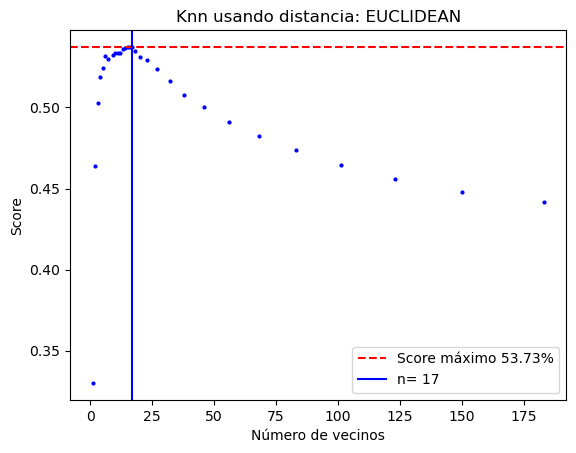

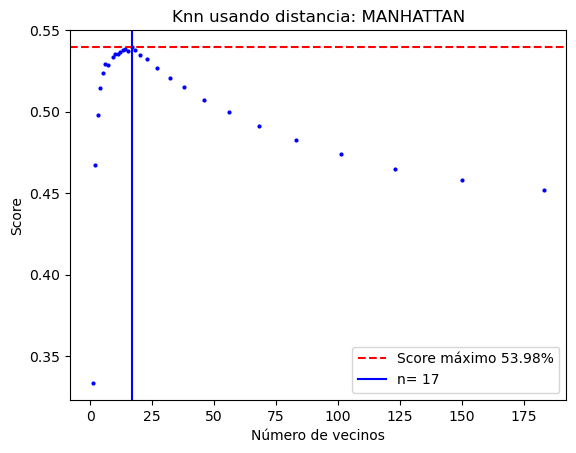

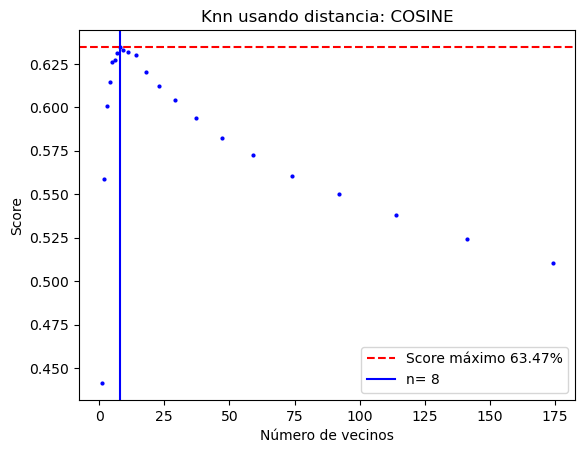

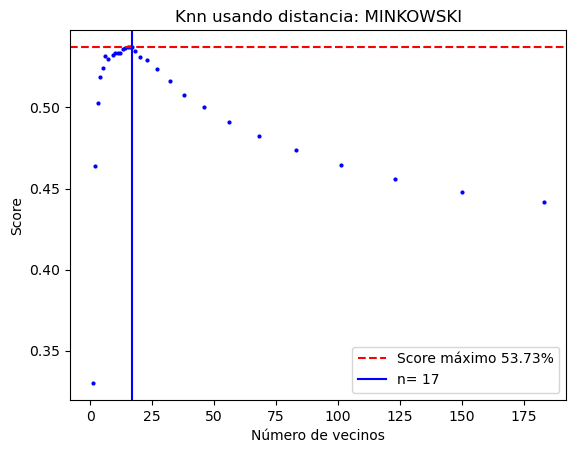

In [291]:
import matplotlib.pyplot as plt; plt.rcdefaults()

for m in scores.keys():
    points = scores[m]
    neighborsX, scoresY = zip(*points)
    plt.scatter(neighborsX, scoresY,s=4,color='b')
    maxScore = max(scoresY)
    bestN = neighborsX[scoresY.index(maxScore)]
    message =  "Score máximo {:.2f}%".format(maxScore*100)
    plt.axhline(maxScore, color='red', linestyle='--', label=message)
    plt.axvline(bestN, color='b', linestyle='-', label="n= "+str(bestN))
    plt.legend()
    plt.xlabel('Número de vecinos')
    plt.ylabel('Score')
    plt.title("Knn usando distancia: "+metrics[m].upper())
    plt.show()


explicar diferencias distancia euclidea y hamming